In [1]:

#______________________________________ SPEED ACCURACY ANALYSIS_______________________________________________________________________

"""import the txt files to python"""
import glob
import pandas as pd
import pickle
import numpy as np
import os
import re
import shutil
import matplotlib.pyplot as plt
%automagic


# (not needed now) made this more explicit since I'm the only one using this script and also only once
#PATH_IN = r"C:\Users\pemas\OneDrive\Desktop\University\Master UOL\Research Project\Code Versions\with support mechanism nr1\Experiment Code\PS_experiment code\experiment_code_held2022-main\analysis\ana01"
#PATH_OUT = r"C:\Users\pemas\OneDrive\Desktop\University\Master UOL\Research Project\Code Versions\with support mechanism nr1\Experiment Code\PS_experiment code\experiment_code_held2022-main\analysis\ana06"
#PATH_OUT_ALL_CORRECT = r"C:\Users\pemas\OneDrive\Desktop\University\Master UOL\Research Project\Code Versions\with support mechanism nr1\Experiment Code\PS_experiment code\experiment_code_held2022-main\analysis\ana06\all_correct/"

# this line will ensure were on the same directory as the python source files
%cd C:\Users\pemas\OneDrive\Desktop\University\Master UOL\Research Project\Code Versions\with support mechanism nr1\Experiment Code\PS_experiment code\experiment_code_held2022-main

PATH_IN = 'analysis/ana01/'
PATH_OUT = 'analysis/ana06/'

CONDITION = '2backPS'

# Check if output directory exists, if not, create it
if not os.path.exists(PATH_OUT):
    os.makedirs(PATH_OUT)

# Check if unmatched directory exists, if not, create it
# if not os.path.exists(PATH_OUT_ALL_CORRECT):
#     os.makedirs(PATH_OUT_ALL_CORRECT)


print(os.getcwd())



Automagic is OFF, % prefix IS needed for line magics.
C:\Users\pemas\OneDrive\Desktop\University\Master UOL\Research Project\Code Versions\with support mechanism nr1\Experiment Code\PS_experiment code\experiment_code_held2022-main
C:\Users\pemas\OneDrive\Desktop\University\Master UOL\Research Project\Code Versions\with support mechanism nr1\Experiment Code\PS_experiment code\experiment_code_held2022-main


C:\Users\pemas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
"""
2Back Model Correct Rate Calculation - Model from Data with support mechanism

This script calculates the correct rate for a 2-Back model based on imagined speed limits and current speeds.
The main steps include loading data from files, defining timestamps, comparing current speeds with imagined
speed limits at specific timestamps, and calculating the correct rate. 
Mismatch timestamps are also stored for analysis.

Parameters:
    CONDITION (str): The condition label, used to filter files for analysis.
    PATH_IN (str): The path to the directory containing input files.
Results:
- Correct Rate per Run:           The script calculates the correct rate for each run based on the comparison between imagined speed limits and current speeds at specific timestamps.
- Overall Average Correct Rate:   After processing all runs, the script calculates the average correct rate across all runs, providing a measure of the overall performance of the 2-Back model.
- mismatch_timestamps_all:        List which stores the timestamps of mismatches, where the imagined speed limit does not match the current speed, "nan" for matching speed

"""
#--------------------------------------------------------------------------------------------------------------------------------------------------

CONDITION = '2backPS'
PATH_IN = 'analysis/ana01/'


if __name__ == '__main__':
    files_condition = pickle.load(open(PATH_IN + 'files_sorted_behavior.p', 'rb'))

    # Define timestamps and corresponding 2back timestamps
    timestamps = [65, 85, 105, 125, 145, 165]
    #timestamps = [75, 95, 115, 135, 155, 175]

    timestamps_2back = [20, 40, 60, 80, 100, 120]

    # calculate correct rate for each condition
    correct_rate_all = []

    # List to store timestamps of mismatches
    mismatch_timestamps_all = []

    for filename in files_condition[CONDITION]:
        # load data from the current file
        data = pickle.load(open(filename, 'rb')) # Dataframe
        
        # Skip the first 10 rows to ignore potential missing data at the beginning
        data = data.iloc[10:]

        try:
            imaginedSpeedLimit = np.array(data['imaginedSpeedlimit']).astype(float)
            currentspeed = np.array(data['currentspeed']).astype(float)
            time = np.array(data['time']).astype(float)
        except ValueError:
            # Handle the case where conversion fails
            print(f"Error: Could not convert value to float in dataset {filename}")
            continue  # Skip processing this dataset and move on to the next one


        
        # Calculate correct rate for the current file
        correct_count = 0
        total_count = 0
        mismatch_timestamps = []  

        for timestamp, timestamp_2back in zip(timestamps, timestamps_2back):
            # Find the index corresponding to the timestamps
            timestamp_index = int(timestamp / 0.05)
            timestamp_2back_index = int(timestamp_2back / 0.05)

            # just to check 
            print(f"Correct 2back for {timestamp-5} was at {timestamp -25}s = {currentspeed[timestamp_2back_index]}")
            print(f"Recalled 2back speed at  {timestamp-5}s was = {imaginedSpeedLimit[timestamp_index]}")


            # Compare imaginedSpeedLimit with currentspeed at the corresponding indices
            if imaginedSpeedLimit[timestamp_index] == currentspeed[timestamp_2back_index]:
                print("yes, correct 2back\n")
                correct_count += 1
            else:
                print("wrong 2back\n")
                # If there's a mismatch, store the timestamp (this is the timestamp of the recall, e.g. 65 tries to recall sign at 20)
                mismatch_timestamps.append(timestamp)
            total_count += 1

        # Store the mismatch timestamps for this file in the overall list
        mismatch_timestamps_all.append(mismatch_timestamps)

        correct_rate = correct_count / total_count if total_count > 0 else 0
        correct_rate_all.append(correct_rate)

        print(f"Correct Rate for run {filename}: {correct_rate}\n")

    # calculate and store average correct rate
    correct_rate_avg = np.mean(correct_rate_all)
    error_rate_avg = 1-correct_rate_avg

    print(f"{CONDITION} Model - Calculation of correct rate done!\n")
    print(f"\nOverall Average Correct Rate: {correct_rate_avg}")
    print(f"Overall Average Error Rate: {error_rate_avg}\n")



Correct 2back for 60 was at 40s = 70.0
Recalled 2back speed at  60s was = 70.0
yes, correct 2back

Correct 2back for 80 was at 60s = 60.0
Recalled 2back speed at  80s was = 60.0
yes, correct 2back

Correct 2back for 100 was at 80s = 90.0
Recalled 2back speed at  100s was = 70.0
wrong 2back

Correct 2back for 120 was at 100s = 80.0
Recalled 2back speed at  120s was = 80.0
yes, correct 2back

Correct 2back for 140 was at 120s = 70.0
Recalled 2back speed at  140s was = 70.0
yes, correct 2back

Correct 2back for 160 was at 140s = 60.0
Recalled 2back speed at  160s was = 60.0
yes, correct 2back

Correct Rate for run analysis/ana01\2backPS_behavior_002.p: 0.8333333333333334

Correct 2back for 60 was at 40s = 90.0
Recalled 2back speed at  60s was = 90.0
yes, correct 2back

Correct 2back for 80 was at 60s = 60.0
Recalled 2back speed at  80s was = 90.0
wrong 2back

Correct 2back for 100 was at 80s = 80.0
Recalled 2back speed at  100s was = 80.0
yes, correct 2back

Correct 2back for 120 was at 1

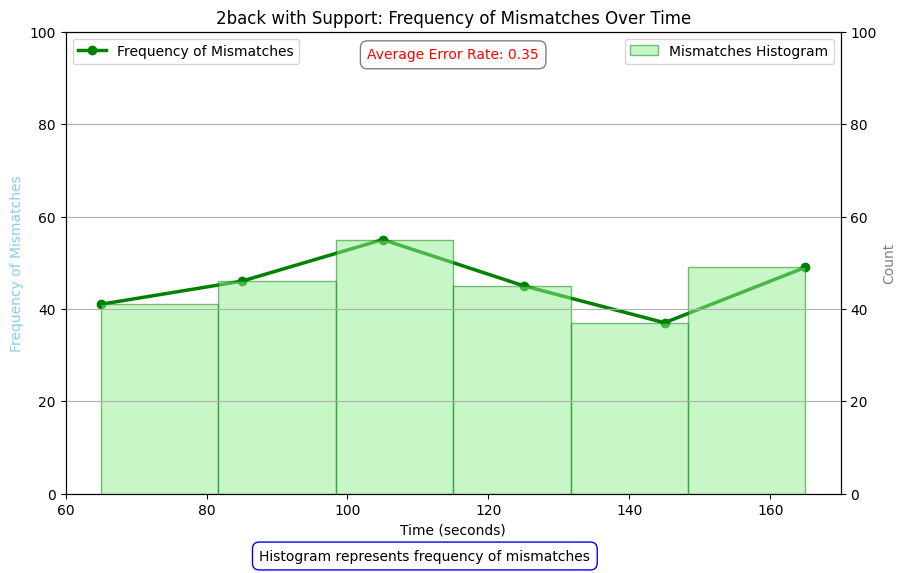

In [3]:
#---------------------------- 1. Curve Plot and Histogram of Frequency of Wrong Recalls (mismatched speed) over time ---------------------

# Flatten the list and remove all the NaN values
all_timestamps = [timestamp for trial in mismatch_timestamps_all for timestamp in trial if not np.isnan(timestamp)]

# Calculate the frequency of mismatches at each timestamp
timestamp_counts = {}
for timestamp in all_timestamps:
    if timestamp not in timestamp_counts:
        timestamp_counts[timestamp] = 1
    else:
        timestamp_counts[timestamp] += 1

# Sort the timestamps and counts by timestamp
sorted_timestamps = sorted(timestamp_counts.keys())
sorted_counts = [timestamp_counts[timestamp] for timestamp in sorted_timestamps]

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot curve plot on primary y-axis with higher z-order
ax1.plot(sorted_timestamps, sorted_counts, marker='o', linestyle='-', color='green', label='Frequency of Mismatches', linewidth=2.5, zorder=2)
ax1.set_xlabel('Time (seconds)')
ax1.set_ylabel('Frequency of Mismatches', color='skyblue')
ax1.set_title('2back with Support: Frequency of Mismatches Over Time')
plt.ylim(0, 100)

# Create secondary y-axis for histogram
ax2 = ax1.twinx()

# Plot histogram on secondary y-axis
ax2.hist(all_timestamps, bins=len(sorted_timestamps), color='lightgreen', edgecolor='green',alpha=0.5, label='Mismatches Histogram', zorder=1)
ax2.set_ylabel('Count', color='grey')

# Show legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.text(0.25, -0.15 , 'Histogram represents frequency of mismatches', transform=plt.gca().transAxes, verticalalignment='bottom', bbox=dict(facecolor='white', edgecolor='blue', boxstyle='round,pad=0.5'))
plt.grid(True)
plt.ylim(0, 100)

# Text annotation for average error rate
error_rate_avg_text = f'Average Error Rate: {error_rate_avg:.2f}'
plt.text(0.5, 0.95, error_rate_avg_text, horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes, fontsize=10, color='red', bbox=dict(facecolor='white', edgecolor='grey', boxstyle='round,pad=0.5'))

plt.show()

In [4]:
# ------------------- get number of CONSECUTIVE wrong recalls ------------------------------------

# Store information about consecutive mismatches per trial
consecutive_mismatches_per_trial = {}

for i, mismatch_list in enumerate(mismatch_timestamps_all, start=1):
    trial_consecutive_mismatches = []
    prev_value = None
    for value in mismatch_list:
        if prev_value is not None and (prev_value != "nan" or value != "nan"):
            # Check if the timestamps are adjacent
            if abs(prev_value - value) == 20:
                trial_consecutive_mismatches.append((prev_value, value))
        prev_value = value

    if trial_consecutive_mismatches:
        consecutive_mismatches_per_trial[f"Run {i}"] = trial_consecutive_mismatches
    # else:
    #     print(f"No consecutive mismatches detected for Run {i}.")


if consecutive_mismatches_per_trial:
    print("Consecutive mismatches occurred at the following timestamps per trial:")
    for trial, mismatches in consecutive_mismatches_per_trial.items():
        total_pairs = len(mismatches)
        print(f"{trial}: {total_pairs} consecutive mismatches found: ", end="")
        print(", ".join([f"{pair[0]} and {pair[1]}" for pair in mismatches]))


Consecutive mismatches occurred at the following timestamps per trial:
Run 6: 1 consecutive mismatches found: 65 and 85
Run 11: 3 consecutive mismatches found: 65 and 85, 85 and 105, 145 and 165
Run 13: 1 consecutive mismatches found: 145 and 165
Run 15: 2 consecutive mismatches found: 65 and 85, 85 and 105
Run 16: 1 consecutive mismatches found: 145 and 165
Run 18: 2 consecutive mismatches found: 105 and 125, 125 and 145
Run 24: 2 consecutive mismatches found: 105 and 125, 125 and 145
Run 28: 3 consecutive mismatches found: 65 and 85, 85 and 105, 105 and 125
Run 29: 3 consecutive mismatches found: 105 and 125, 125 and 145, 145 and 165
Run 32: 2 consecutive mismatches found: 125 and 145, 145 and 165
Run 40: 1 consecutive mismatches found: 145 and 165
Run 41: 1 consecutive mismatches found: 145 and 165
Run 44: 1 consecutive mismatches found: 105 and 125
Run 45: 1 consecutive mismatches found: 85 and 105
Run 48: 1 consecutive mismatches found: 145 and 165
Run 53: 2 consecutive mismatches

In [5]:
# Some calculations needed for some the plots later on

# Flatten the list and remove NaN values
all_timestamps = [timestamp for trial in mismatch_timestamps_all for timestamp in trial if not np.isnan(timestamp)]

# Calculate the frequency of mismatches at each timestamp
timestamp_counts = {}
for timestamp in all_timestamps:
    if timestamp not in timestamp_counts:
        timestamp_counts[timestamp] = 1
    else:
        timestamp_counts[timestamp] += 1

# Sort the timestamps and counts by timestamp
sorted_timestamps = sorted(timestamp_counts.keys())
sorted_counts = [timestamp_counts[timestamp] for timestamp in sorted_timestamps]


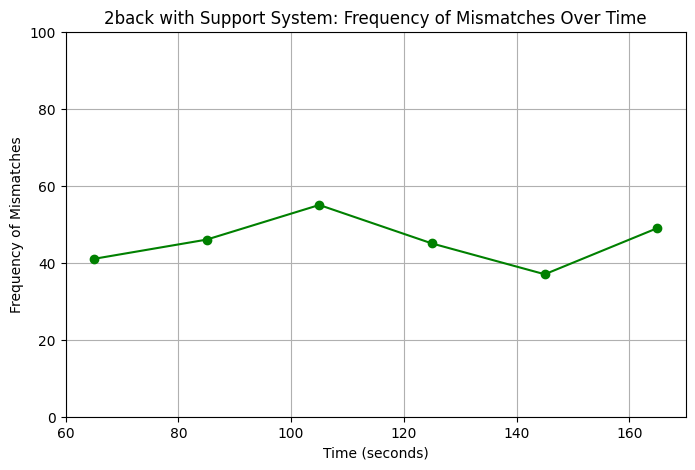

In [6]:
#------------------------- 2. Curve plot (only) of the relationship btw. timestamps and the frequency of wrong recalls ----------------------

# Create a curve plot
plt.figure(figsize=(8, 5))
plt.plot(sorted_timestamps, sorted_counts, marker='o', linestyle='-', color='green')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency of Mismatches')
plt.title('2back with Support System: Frequency of Mismatches Over Time')
plt.ylim(0, 100)
plt.grid(True)
plt.show()

#-----------------------------------  Save relevant variables -----------this is the one I merged with the other dataset earlier----------------------------------

# # Save relevant variables
# with open(os.path.join(PATH_OUT, 'mismatch_data.p'), 'wb') as f:
#     pickle.dump({'sorted_timestamps': sorted_timestamps, 'sorted_counts': sorted_counts}, f)

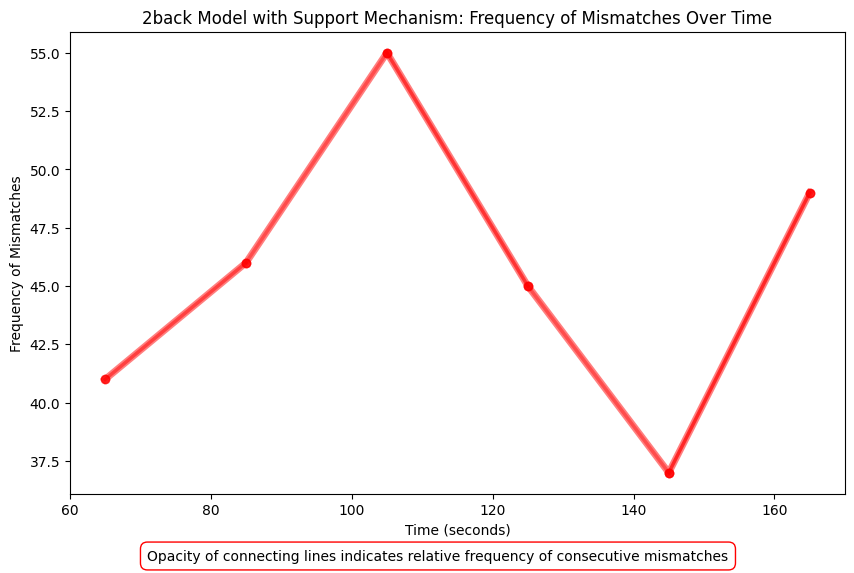

In [7]:
# -------------------------- 3. Curve Plot with connecting lines indicates relative frequency of consecutive mismatches-----------------


# Note to self: maybe later add here the connections between mismatches that are more than 20s apart 


# Curve plot
plt.figure(figsize=(10, 6))
plt.plot(sorted_timestamps, sorted_counts, marker='o', linestyle='-', color='red', label='Frequency of Mismatches', linewidth=5,alpha=0.5)
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency of Mismatches')
plt.title('2back Model with Support Mechanism: Frequency of Mismatches Over Time')

# Count frequency of each pair
pair_counts = {}
for mismatches in consecutive_mismatches_per_trial.values():
    for pair in mismatches:
        if pair in pair_counts:
            pair_counts[pair] += 1
        else:
            pair_counts[pair] = 1

# Plot markers with varying opacity for consecutive mismatches
max_pair_count = max(pair_counts.values())
for pair, count in pair_counts.items():
    opacity = count / max_pair_count * 0.7  # Reduced opacity for better visibility
    plt.plot(pair, [timestamp_counts[pair[0]], timestamp_counts[pair[1]]], marker='o', color='red', alpha=opacity, label='Consecutive Mismatches', linewidth=2.5)


plt.text(0.1, -0.15 , 'Opacity of connecting lines indicates relative frequency of consecutive mismatches', transform=plt.gca().transAxes, verticalalignment='bottom', bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=0.5'))
#plt.ylim(0, 100)
plt.show()

In [8]:
#------------------------------- Count how often which sequence of recalls was wrong twice ---------------------------


# Flatten the list of concurrent mismatches per trial
concurrent_mismatches = [pair for mismatches in consecutive_mismatches_per_trial.values() for pair in mismatches]

# Count frequency of each pair in concurrent_mismatches
pair_counts = {}
for pair in concurrent_mismatches:
    if pair in pair_counts:
        pair_counts[pair] += 1
    else:
        pair_counts[pair] = 1


# Sort the pairs based on the first element of each pair
sorted_pairs = sorted(pair_counts.items(), key=lambda x: x[0][0])

# Print the sorted pairs and their counts
print("On these timestamps the model made a wrong recall two times directly after another:")

for pair, count in sorted_pairs:
    print(f"Pair: {pair}, Count: {count}")


On these timestamps the model made a wrong recall two times directly after another:
Pair: (65, 85), Count: 15
Pair: (85, 105), Count: 12
Pair: (105, 125), Count: 18
Pair: (125, 145), Count: 12
Pair: (145, 165), Count: 21


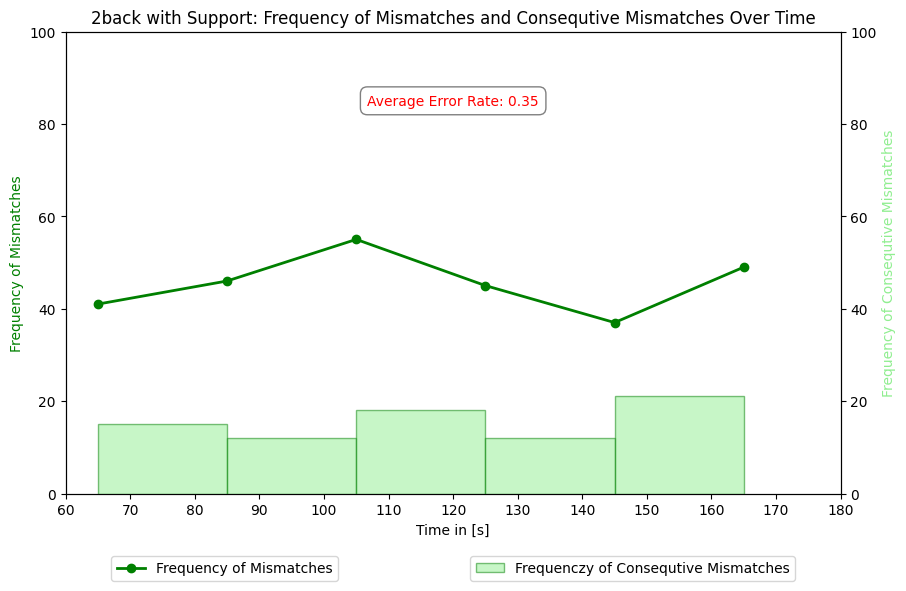

In [9]:
# --------------correct!--------------------- Frequency of Mismatches and Consequtive Mismatches Over Time -------------------------------------------

# Flatten the list and remove NaN values
all_timestamps = [timestamp for trial in mismatch_timestamps_all for timestamp in trial if not np.isnan(timestamp)]

# Calculate the frequency of mismatches at each timestamp
timestamp_counts = {}
for timestamp in all_timestamps:
    if timestamp not in timestamp_counts:
        timestamp_counts[timestamp] = 1
    else:
        timestamp_counts[timestamp] += 1

# Sort the timestamps and counts by timestamp
sorted_timestamps = sorted(timestamp_counts.keys())
sorted_counts2 = [timestamp_counts[timestamp] for timestamp in sorted_timestamps]

# Create bins for the histogram based on timestamps
bins = np.arange(min(sorted_timestamps), max(sorted_timestamps) + 1, 20)  # Adjust bin size as needed

# Flatten the list of concurrent mismatches per trial
concurrent_mismatches = [pair for mismatches in consecutive_mismatches_per_trial.values() for pair in mismatches]

# Count frequency of each pair within each bin
pair_counts = np.zeros(len(bins) - 1)
for pair in concurrent_mismatches:
    for i in range(len(bins) - 1):
        if bins[i] <= pair[0] < bins[i + 1] or bins[i] <= pair[1] < bins[i + 1]:
            pair_counts[i] += 1


# Sort the pairs based on both elements of each pair
#sorted_pairs = sorted(pair_counts.items(), key=lambda x: (x[0][0], x[0][1]))            # ?? idk 

# Extract pairs and counts
pairs = [pair for pair, count in sorted_pairs]
counts = [count for pair, count in sorted_pairs]

# Create figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))  

# Plot curve plot on the primary y-axis
ax1.plot(sorted_timestamps, sorted_counts2, marker='o', linestyle='-', color='green', linewidth=2, label='Frequency of Mismatches')
ax1.set_xlabel('Time in [s]')
ax1.set_ylabel('Frequency of Mismatches', color='green')
ax1.set_title('2back with Support: Frequency of Mismatches and Consequtive Mismatches Over Time')
plt.ylim(0, 100)

# Create secondary y-axis
ax2 = ax1.twinx()

# Calculate bin centers for histogram bars
bin_centers = [(pair[0] + pair[1]) / 2 for pair in pairs]

# Plot histogram on the secondary y-axis
bar_width = 20  # Adjust the width of the bars as needed
x_values = np.array(bin_centers) - bar_width / 2 + 10  # Shift x-values by half of the bin width
ax2.bar(x_values, counts, width=bar_width, color='lightgreen', alpha=0.5, edgecolor='green',label='Frequenczy of Consequtive Mismatches')
ax2.set_ylabel('Frequency of Consequtive Mismatches', color='lightgreen')
plt.ylim(0, 100)

# Set right y-axis ticks to match the actual counts
#max_count_hist = max(counts)
#ax2.set_yticks(np.arange(0, max_count_hist+1, step=5))
ax2.set_yticks(np.arange(0, 100+1, step=20))


# Set x-axis ticks and labels
ax2.set_xticks(bin_centers)
ax2.set_xticklabels([f"{pair[0]} - {pair[1]}" for pair in pairs])

# Customize x-axis ticks for Histogram (right axis)
time_seconds = np.arange(60, 181, 10)
ax1.set_xticks(time_seconds)
ax1.set_xticklabels([f"{sec}" for sec in time_seconds])

# Add legend with more space
ax1.legend(loc='upper left', bbox_to_anchor=(0.05, -0.12))  
ax2.legend(loc='upper right', bbox_to_anchor=(0.95, -0.12))  

# Text annotation for average error rate
error_rate_avg_text = f'Average Error Rate: {error_rate_avg:.2f}'
plt.text(0.5, 0.85, error_rate_avg_text, horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes, fontsize=10, color='red', bbox=dict(facecolor='white', edgecolor='grey', boxstyle='round,pad=0.5'))
plt.show()

In [10]:
# ---------------------------store the data so I can merge it with the baseline data in another plot -----------------------------


# Define the output file path
output_file_path = os.path.join(PATH_OUT, 'support_data_consequtive_mismatches_plot.pkl')

# Open the file and dump the relevant information
with open(output_file_path, 'wb') as file:
    pickle.dump({
        'sorted_timestamps': sorted_timestamps,
        'sorted_counts2': sorted_counts2,
        'pairs': pairs,
        'counts': counts
    }, file)


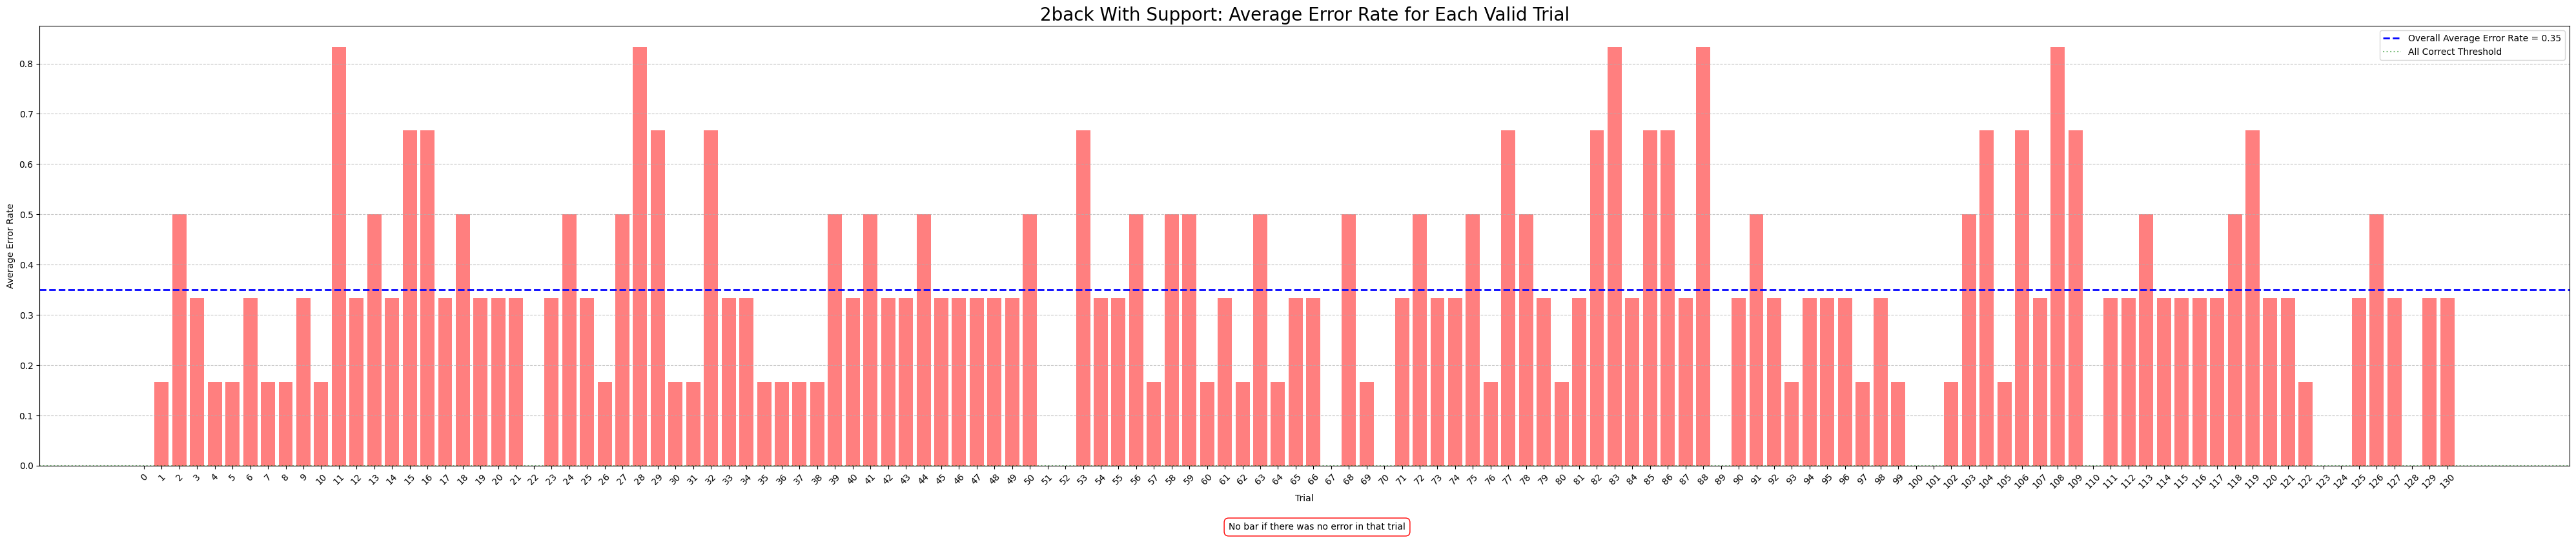

In [11]:
#----------------------------------- ERROR RATES ACROSS TRIALS  ---------------------------------------------------------------------------------------------

error_rate_all = [1 - rate for rate in correct_rate_all]

# Plot the average error rate for each trial
plt.figure(figsize=(40, 8))
plt.bar(range(1, len(error_rate_all) + 1), error_rate_all, color='red', alpha=0.5)
plt.axhline(1 - correct_rate_avg, color='blue', linestyle='--', linewidth=2, label=f'Overall Average Error Rate = {1 - correct_rate_avg}', alpha=0.99)
plt.axhline(0.0, color='green', linestyle=':', label='All Correct Threshold', alpha=0.5) 
plt.xlabel('Trial')
plt.ylabel('Average Error Rate')
plt.title('2back With Support: Average Error Rate for Each Valid Trial', fontsize=20)
plt.legend()
plt.xticks(range(0, len(error_rate_all) + 1), rotation=45)  # Rotate x-axis labels by 45 degrees
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.text(0.47, -0.15 , 'No bar if there was no error in that trial', transform=plt.gca().transAxes, verticalalignment='bottom', bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=0.5'))
plt.show()

0 wrong recalls per trial occurred 9.23% of all trials
1 wrong recalls per trial occurred 20.00% of all trials
2 wrong recalls per trial occurred 40.00% of all trials
3 wrong recalls per trial occurred 16.92% of all trials
4 wrong recalls per trial occurred 10.00% of all trials
5 wrong recalls per trial occurred 3.85% of all trials


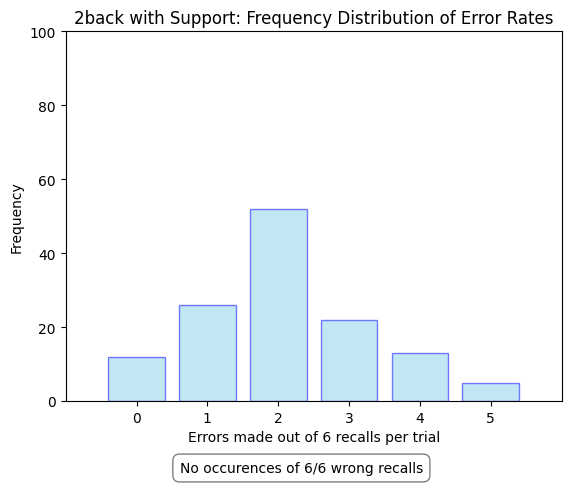

In [12]:

#----------------------------------------- Frequency Distribution of ERROR RATES ------------------------------------------------------


# Calculate error rates by subtracting correct rates from 1
error_rate_all = [1 - rate for rate in correct_rate_all]

# Define custom bins
error_rate_bins = [0.00, 0.16, 0.33, 0.50, 0.66, 0.83, 1.00]

# Calculate the histogram of error rates with custom bins
hist, _ = np.histogram(error_rate_all, bins=error_rate_bins)

# Plot histogram with adjusted x-axis
plt.bar(np.arange(1, len(hist)+1), hist, color='skyblue', edgecolor='blue', alpha=0.5)

# Set ticks on x-axis
plt.xticks(np.arange(1, len(hist)+1), np.arange(0, len(hist)))  # Adjust x-axis labels

# Add text annotation
plt.xlabel('Errors made out of 6 recalls per trial')
plt.ylabel('Frequency')
plt.title('2back with Support: Frequency Distribution of Error Rates')
plt.ylim(0,100)  # Adjust y-axis limit for better visualization
plt.xlim(0, 7)  # Adjust x-axis limits to include the first and last bars

#-----------------------------------------------
# Calculate total number of trials
total_trials = 130

# Print the percentage of instances per bin
for i, count in enumerate(hist):
    wrong_recalls = i  # Number of wrong recalls
    percentage = (count / total_trials) * 100
    print(f"{wrong_recalls} wrong recalls per trial occurred {percentage:.2f}% of all trials")
#-----------------------------------------------

#Add text annotation
    # plt.text(0.85, 44, 
    #         '0.00:   6/6 incorrect\n'
    #         '0.16:  5/6 incorrect\n'
    #         '0.33:  4/6 incorrect\n'
    #         '0.50:  3/6 incorrect\n'
    #         '0.66:  2/6 incorrect\n'
    #         '0.83:  1/6 incorrect\n'
    #         '1.00:    0 incorrect', 
    #         fontsize=10,
    #         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'),
    #         verticalalignment='top', horizontalalignment='center')

plt.text(0.23, -0.2 , 'No occurences of 6/6 wrong recalls', transform=plt.gca().transAxes, verticalalignment='bottom', bbox=dict(facecolor='white', edgecolor='grey', boxstyle='round,pad=0.5'))

plt.show()


# ------------ save relevant variables to merge with baseline dataset in one figure--------
# Save relevant variables into a file
error_r_supp_data = {
    'error_rate_all': error_rate_all,
    'hist': hist,
    'total_trials': total_trials
}

with open(os.path.join(PATH_OUT, 'error_rates_histrogram_support.p'), 'wb') as f:
    pickle.dump(error_r_supp_data, f)



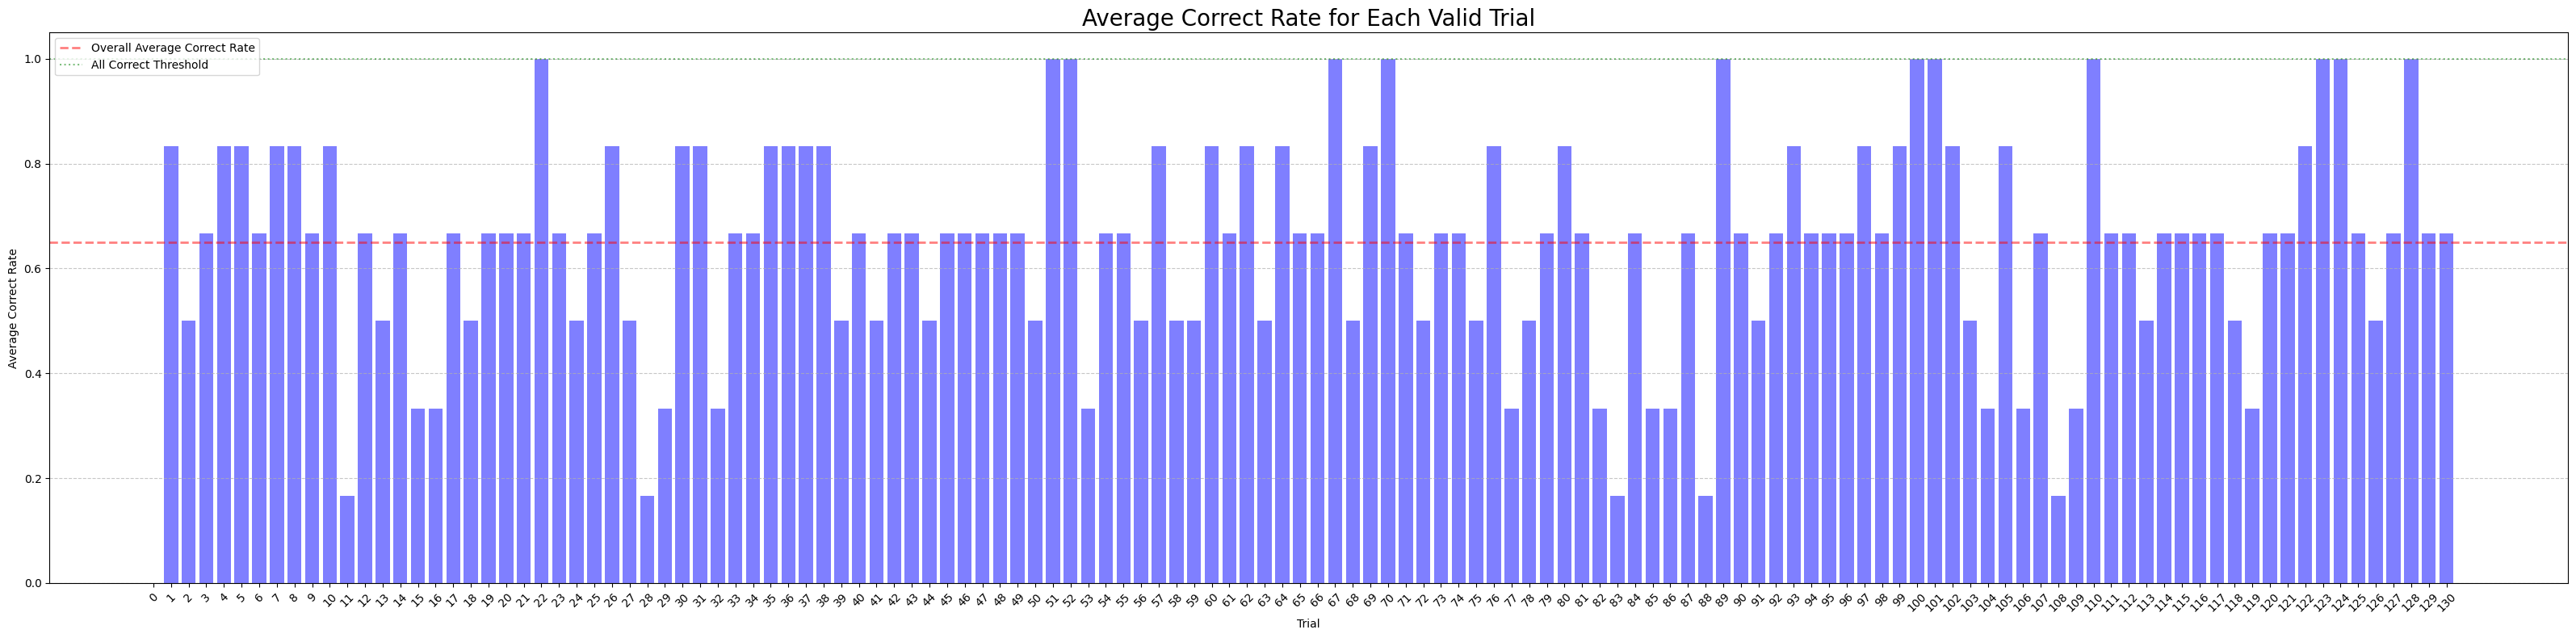

In [13]:
# -------------------------------------------- CORRECT RATE  -----------------------------------------------------------------------------------

# Plot the average correct rate for each trial
plt.figure(figsize=(32, 8))

plt.bar(range(1, len(correct_rate_all) + 1), correct_rate_all, color='blue', alpha=0.5)
plt.axhline(correct_rate_avg, color='red', linestyle='--', linewidth=2, label='Overall Average Correct Rate', alpha=0.5)
plt.axhline(1.0, color='green', linestyle=':', label='All Correct Threshold',alpha=0.5) 
plt.xlabel('Trial')
plt.ylabel('Average Correct Rate')
plt.title('Average Correct Rate for Each Valid Trial', fontsize=20)
plt.legend()
plt.xticks(range(0, len(correct_rate_all) + 1), rotation=45)  # Rotate x-axis labels by 45 degrees
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


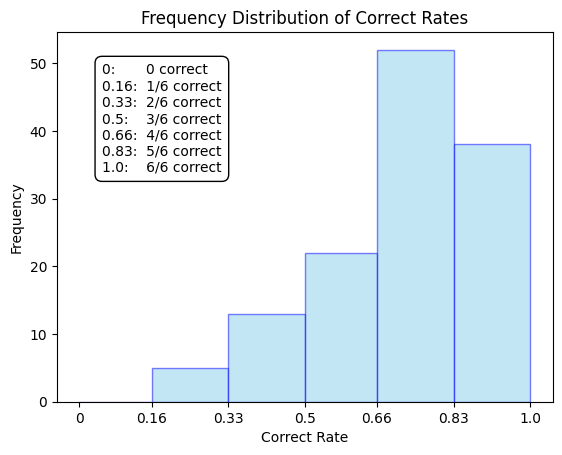

In [14]:
#----------------------------------------------- Histogram of CORRECT RATES ------------------------------------------------------

# Define custom bins
correct_rate_bins = [0, 0.16, 0.33, 0.5, 0.66, 0.83, 1.0]

# Create a histogram of correct rates with custom bins
plt.hist(correct_rate_all, bins=correct_rate_bins, color='skyblue', edgecolor='blue', alpha=0.5)
plt.title('Frequency Distribution of Correct Rates')

# Set ticks on x-axis
plt.xticks(correct_rate_bins, correct_rate_bins)

# Add text annotation
plt.text(0.05, 50, 
         '0:       0 correct\n'
         '0.16:  1/6 correct\n'
         '0.33:  2/6 correct\n'
         '0.5:    3/6 correct\n'
         '0.66:  4/6 correct\n'
         '0.83:  5/6 correct\n'
         '1.0:    6/6 correct', 
         fontsize=10,
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'),
         verticalalignment='top', horizontalalignment='left')

plt.xlabel('Correct Rate')
plt.ylabel('Frequency')


plt.show()



In [15]:
#____________________________________ to look at individual datasets and check why they don't load____________________________________________

# Specify the filename of the dataset to inspect
filename_to_inspect = '2backPS_behavior_252.p'

# Load the specified dataset as a DataFrame
data_to_inspect = pickle.load(open(PATH_IN + filename_to_inspect, 'rb'))

# look at head 
#print(data_to_inspect.head())


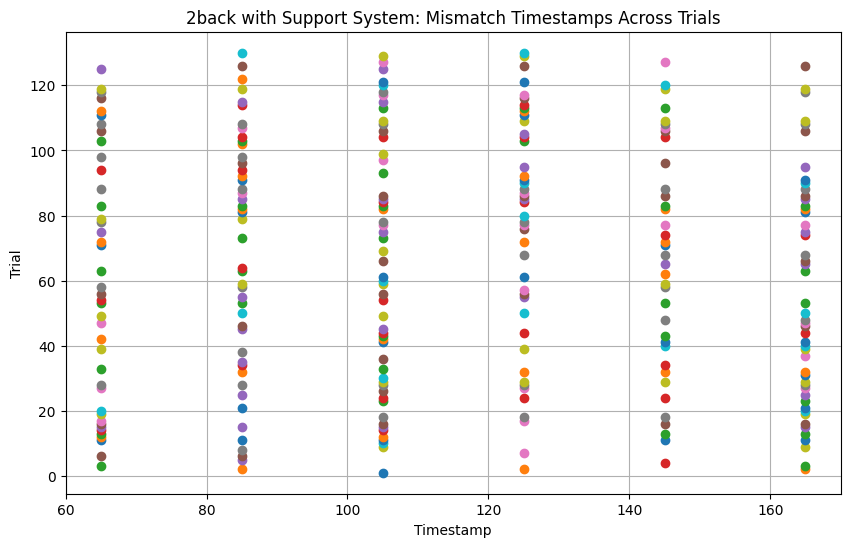

In [16]:
#-------------------------------------------- INDIV. TIMESTAMPS OF MISMATCHED SPEED ---------------------------------------------------------

# Plotting
plt.figure(figsize=(10, 6))
for trial, timestamps in enumerate(mismatch_timestamps_all, start=1):
    plt.plot(timestamps, [trial] * len(timestamps), 'o', label=f'Trial {trial}')

plt.xlabel('Timestamp')
plt.ylabel('Trial')
plt.title('2back with Support System: Mismatch Timestamps Across Trials')
#plt.legend()
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


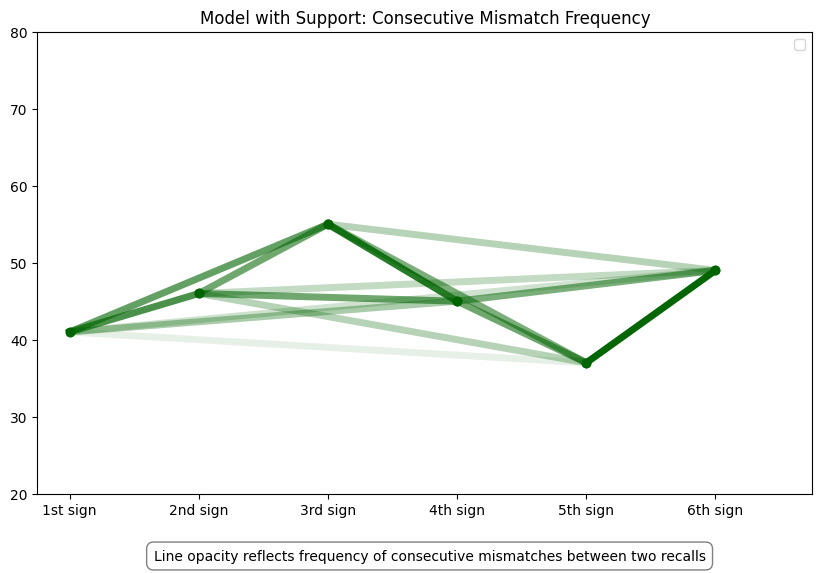

In [17]:
# -------------------------- Consecutive Mismatch Frequency: Line Opacity Representation ----------------


# Store information about consecutive mismatches per trial
consecutive_mismatches_per_trial = {}

for i, mismatch_list in enumerate(mismatch_timestamps_all, start=1):
    trial_consecutive_mismatches = []
    prev_value = None
    for value in mismatch_list:
        if prev_value is not None and (prev_value != "nan" or value != "nan"):
            trial_consecutive_mismatches.append((prev_value, value))
        prev_value = value

    if trial_consecutive_mismatches:
        consecutive_mismatches_per_trial[f"run {i}"] = trial_consecutive_mismatches

if consecutive_mismatches_per_trial:
    #print("Consecutive mismatches occurred at the following timestamps per trial:")
    for trial, mismatches in consecutive_mismatches_per_trial.items():
        total_pairs = len(mismatches)
        #print(f"{trial}: {total_pairs} consecutive mismatches found: ", end="")
        #print(", ".join([f"{pair[0]} and {pair[1]}" for pair in mismatches]))
else:
    print("No consecutive mismatches detected for any run.")
     
#---------------------------------------------------------------------------------------------------

# Curve plot
plt.figure(figsize=(10, 6))
# plt.plot(sorted_timestamps, sorted_counts, marker='o', linestyle='--', color='grey', label='Frequency of Mismatches', linewidth=5,alpha=0.3)
# plt.xlabel('Time (seconds)')
# plt.ylabel('Frequency of Mismatches')
plt.title('Model with Support: Consecutive Mismatch Frequency')

# Count frequency of each pair
pair_counts = {}
for mismatches in consecutive_mismatches_per_trial.values():
    for pair in mismatches:
        if pair in pair_counts:
            pair_counts[pair] += 1
        else:
            pair_counts[pair] = 1

# Plot markers with varying opacity for consecutive mismatches
max_pair_count = max(pair_counts.values())
for pair, count in pair_counts.items():
    opacity = count / max_pair_count * 0.99  # Reduced opacity for better visibility
    plt.plot(pair, [timestamp_counts[pair[0]], timestamp_counts[pair[1]]], marker='o', color='darkgreen', alpha=opacity, linewidth=5)


plt.text(0.15, -0.15 , 'Line opacity reflects frequency of consecutive mismatches between two recalls', transform=plt.gca().transAxes, verticalalignment='bottom', bbox=dict(facecolor='white', edgecolor='grey', boxstyle='round,pad=0.5'))
plt.xticks(np.arange(60, 181, 20)) 
plt.xticks([65, 85, 105, 125, 145, 165], ['1st sign', '2nd sign', '3rd sign', '4th sign', '5th sign', '6th sign'])
plt.ylim(20,80)
plt.legend()
plt.show()


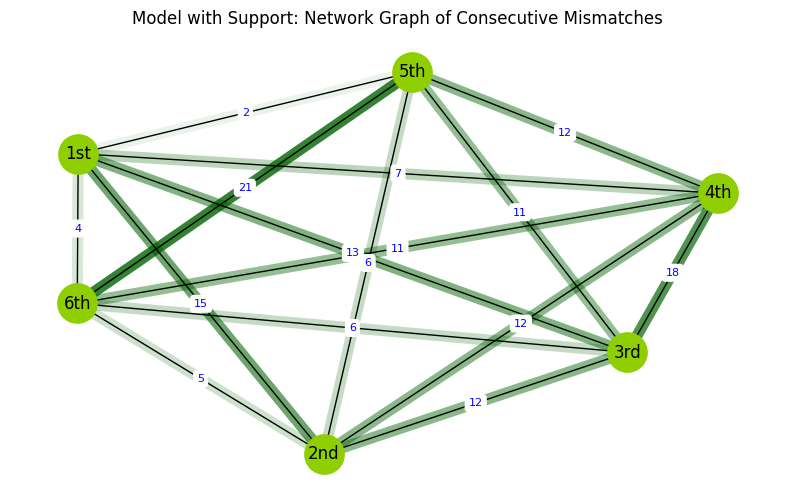

In [18]:
import matplotlib.pyplot as plt
import networkx as nx

plt.figure(figsize=(10, 6))

# Create a new graph
G = nx.Graph()

# Add nodes (timestamps)
for mismatches in consecutive_mismatches_per_trial.values():
    for pair in mismatches:
        G.add_node(pair[0])
        G.add_node(pair[1])

# Add edges (consecutive mismatches)
for mismatches in consecutive_mismatches_per_trial.values():
    for pair in mismatches:
        if G.has_edge(pair[0], pair[1]):
            # Increment edge weight if edge already exists
            G[pair[0]][pair[1]]['weight'] += 1
        else:
            # Add new edge with weight 1
            G.add_edge(pair[0], pair[1], weight=1)

# Relabel nodes with ordinal names
ordinal_names = {65: '1st', 85: '2nd', 105: '3rd', 125: '4th', 145: '5th', 165: '6th'}  
G = nx.relabel_nodes(G, ordinal_names)

# Draw the network graph with scaled edge thickness and opacity
pos = nx.spring_layout(G)  # Position nodes using a spring layout algorithm

# Get edge weights
edge_weights = [data['weight'] for _, _, data in G.edges(data=True)]
max_edge_weight = max(edge_weights)

# Draw edges with varying opacity based on their weights
for u, v, data in G.edges(data=True):
    edge_weight = data['weight']
    scaled_opacity = edge_weight / max_edge_weight  # Scale opacity to range [0, 1]
    nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], edge_color='darkgreen', alpha=scaled_opacity * 0.8, width=8)  

# Draw nodes
nx.draw(G, pos, with_labels=True, node_size=800, node_color='#8fce00')

# Add edge labels with weights (tilted)
edge_labels = {(n1, n2): d['weight'] for n1, n2, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, rotate=0, font_size=8, font_color='blue')  
plt.title('Model with Support: Network Graph of Consecutive Mismatches')
plt.show()


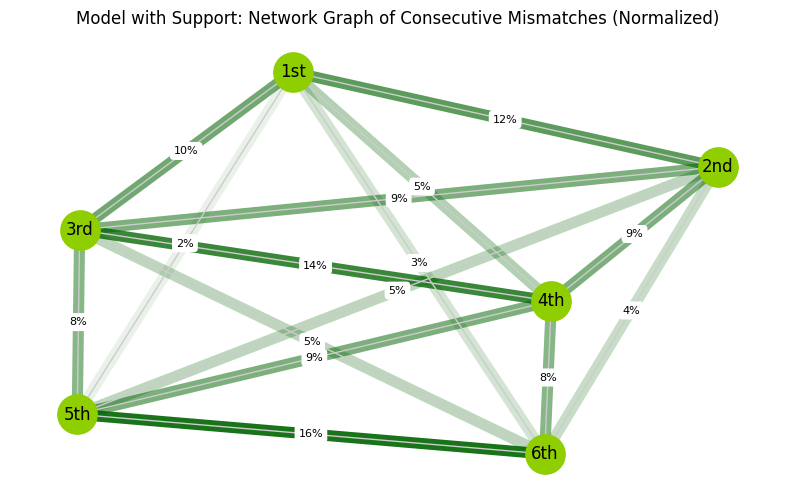

In [19]:

# ---------------------- Network - normalised -----------------------------------------------------------

plt.figure(figsize=(10, 6))

# Create a new graph
G = nx.Graph()

# Add nodes (timestamps)
for mismatches in consecutive_mismatches_per_trial.values():
    for pair in mismatches:
        G.add_node(pair[0])
        G.add_node(pair[1])

# Add edges (consecutive mismatches)
for mismatches in consecutive_mismatches_per_trial.values():
    for pair in mismatches:
        if G.has_edge(pair[0], pair[1]):
            # Increment edge weight if edge already exists
            G[pair[0]][pair[1]]['weight'] += 1
        else:
            # Add new edge with weight 1
            G.add_edge(pair[0], pair[1], weight=1)

# Relabel nodes with ordinal names
ordinal_names = {65: '1st', 85: '2nd', 105: '3rd', 125: '4th', 145: '5th', 165: '6th'}  
G = nx.relabel_nodes(G, ordinal_names)

# Normalize edge labels based on the total number of trials
total_trials = 130
for u, v, data in G.edges(data=True):
    data['weight'] /= total_trials

# Recalculate max edge weight after normalization
max_edge_weight = max([data['weight'] for _, _, data in G.edges(data=True)])

# Draw the network graph with scaled edge thickness and opacity
pos = nx.spring_layout(G)  # Position nodes using a spring layout algorithm

# Draw edges with varying opacity based on their weights
for u, v, data in G.edges(data=True):
    edge_weight = data['weight']
    scaled_opacity = edge_weight / max_edge_weight  # Scale opacity to range [0, 1]
    nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], edge_color='darkgreen', alpha=scaled_opacity * 0.9, width=8)   

# Draw nodes
nx.draw(G, pos, with_labels=True, node_size=800, node_color='#8fce00', edge_color=(0.8, 0.8, 0.8))

# Add edge labels with weights (tilted)
edge_labels = {(n1, n2): '{:.0f}%'.format(round(d['weight'] * 100)) for n1, n2, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, rotate=0, font_size=8, font_color='black')  
plt.title('Model with Support: Network Graph of Consecutive Mismatches (Normalized)')
plt.show()


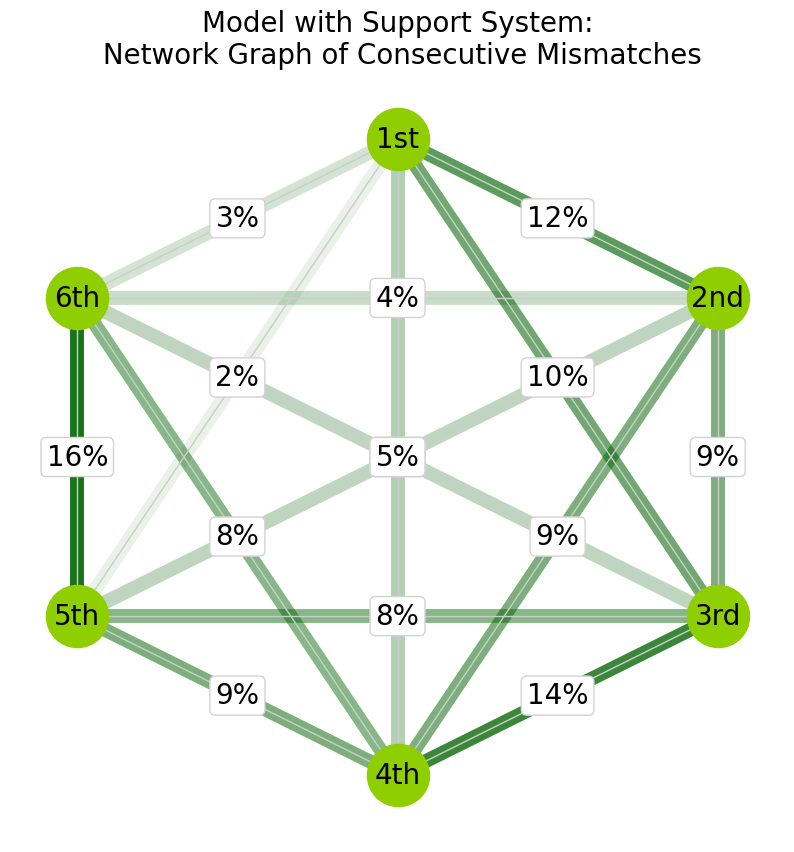

In [27]:
import matplotlib.pyplot as plt
import networkx as nx

plt.figure(figsize=(10, 10))

# Create a new graph
G = nx.Graph()

# Add nodes (timestamps)
for mismatches in consecutive_mismatches_per_trial.values():
    for pair in mismatches:
        G.add_node(pair[0])
        G.add_node(pair[1])

# Add edges (consecutive mismatches)
for mismatches in consecutive_mismatches_per_trial.values():
    for pair in mismatches:
        if G.has_edge(pair[0], pair[1]):
            # Increment edge weight if edge already exists
            G[pair[0]][pair[1]]['weight'] += 1
        else:
            # Add new edge with weight 1
            G.add_edge(pair[0], pair[1], weight=1)

# Relabel nodes with ordinal names
ordinal_names = {65: '1st', 85: '2nd', 105: '3rd', 125: '4th', 145: '5th', 165: '6th'}  
G = nx.relabel_nodes(G, ordinal_names)

# Normalize edge labels based on the total number of trials
total_trials = 130
for u, v, data in G.edges(data=True):
    data['weight'] /= total_trials

# Recalculate max edge weight after normalization
max_edge_weight = max([data['weight'] for _, _, data in G.edges(data=True)])

# Fixed node positions forming a hexagon
node_positions = {'1st': (0, 1), '2nd': (0.866, 0.5), '3rd': (0.866, -0.5), '4th': (0, -1), '5th': (-0.866, -0.5), '6th': (-0.866, 0.5)}

# Draw the network graph with scaled edge thickness and opacity

# Draw edges with varying opacity based on their weights
for u, v, data in G.edges(data=True):
    edge_weight = data['weight']
    scaled_opacity = edge_weight / max_edge_weight  # Scale opacity to range [0, 1]
    nx.draw_networkx_edges(G, node_positions, edgelist=[(u, v)], edge_color='darkgreen', alpha=scaled_opacity * 0.9, width=10)   

# Draw nodes
nx.draw(G, node_positions, with_labels=True, node_size=2000, node_color='#8fce00', edge_color=(0.8, 0.8, 0.8),font_size=20)

# Add edge labels with weights (tilted)
edge_labels = {(n1, n2): '{:.0f}%'.format(round(d['weight'] * 100)) for n1, n2, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, node_positions, edge_labels=edge_labels, rotate=0, font_size=20, font_color='black', bbox=dict(facecolor='white', edgecolor='lightgrey',boxstyle='round,pad=0.2'))
plt.title('Model with Support System:\n Network Graph of Consecutive Mismatches', fontsize=20)



# Save the figure as SVG
plt.savefig('support_network_graph.svg', format='svg')
plt.show()